## Entendendo a adimplência/inadimplência de clientes

Vamos explorar os dados presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Os dados estão no arquivo CSV e contém dados bancários de diversos clientes. Nesse notebook iremos tratá-los e analisá-los para entender a inadimplência de alguns clientes, descrito na coluna default: (`default = 0`) = adimplente,  (`default = 1`) = inadimplente.

#### Descrição dos dados em um gráfico simples:



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |


#### Importando as bibliotecas necessárias:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1 - Lendo os dados num dataframe:

In [3]:
df = pd.read_csv('/kaggle/input/credit/credito.csv', na_values='na')

In [19]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


### 2 - Estrutura:

In [10]:
df.shape # Quantidade de linhas e colunas

(10127, 16)

#### Visualizando a quantidade de linhas, clientes adimplentes e clientes inadimplentes

In [13]:
qtd_total, _ = df.shape
qtd_total_adimplentes, _ = df[df["default"] == 0].shape
qtd_total_inadimplentes, _ = df[df["default"] == 1].shape

In [16]:
print(f'A quantidade de clientes adimplentes é de {qtd_total_adimplentes}, tendo uma proporção de {round(100 * qtd_total_adimplentes/qtd_total, 2)}%')
print(f'A quantidade de clientes inadimplentes é de {qtd_total_inadimplentes}, tendo uma proporção de {round(100 * qtd_total_inadimplentes/qtd_total, 2)}%')

A quantidade de clientes adimplentes é de 8500, tendo uma proporção de 83.93%
A quantidade de clientes inadimplentes é de 1627, tendo uma proporção de 16.07%


### 3 - Tipos de dados:

In [18]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [17]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

#### Selecionando atributos categóricos

In [20]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


#### Selecionando atributos numéricos

In [23]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### 4 - Transformação e limpeza de dados:

#### Verificando quais colunas possuem dados faltantes

In [24]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

#### Função para levantar estatísticas das colunas faltantes

In [26]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [27]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


#### Verificando os dados faltantes nas colunas de clientes adimplentes

In [28]:
stats_dados_faltantes(df=df[df["default"] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


#### Verificando os dados faltantes nas colunas de clientes inadimplentes

In [29]:
stats_dados_faltantes(df=df[df["default"] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


### 4.1 - Correção de schemas:

#### Percebe-se que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`). Nessa etapa iremos transformar esses dados categóricos em dados numéricos do tipo (`dtype = float`)

In [31]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [32]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


#### Função lambda para tratar os dados

In [30]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

In [ ]:
df['limite_credito'] = df['limite_credito'].apply(fn)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)

#### Descrevendo os dados novamente:

In [38]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [39]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [40]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### 4.2 - Remoção de dados faltantes:

In [41]:
df.dropna(inplace=True)

In [42]:
df.shape

(7081, 16)

In [43]:
df[df["default"] == 0].shape # Clientes adimplentes

(5968, 16)

In [44]:
df[df["default"] == 1].shape # Clientes inadimplentes

(1113, 16)

In [45]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [49]:
print(f'Proporção antiga de clientes adimplentes {round(100 * qtd_total_adimplentes / qtd_total, 2)}')
print(f'Proporção nova de clientes adimplentes {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}')
print("")
print(f'Proporção antiga de clientes inadimplentes {round(100 * qtd_total_inadimplentes / qtd_total, 2)}')
print(f'Proporção nova de clientes inadimplentes {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}')

Proporção antiga de clientes adimplentes 83.93
Proporção nova de clientes adimplentes 84.28

Proporção antiga de clientes inadimplentes 16.07
Proporção nova de clientes inadimplentes 15.72


### 5 - Visualização dos dados


#### Nessa etapa iremos visualizar os dados em tabelas correlacionando os dados para entender qual é o fator que leva um cliente à inadimplência

In [83]:
sns.set_style('whitegrid')

In [84]:
df_adimplentes = df[df["default"] == 0]

In [85]:
df_inadimplentes = df[df["default"] == 1]

#### Criando funções para a visualização dos dados

In [76]:
# Visualização em gráfico de barras

def dataframe_to_barplot(df: list[pd.DataFrame], coluna: str, titulos: list, eixo: int, max_y: int, max: pd.DataFrame) -> None:
    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
    for dataframe in df:
      df_to_plot = dataframe[coluna].value_counts().to_frame()
      df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
      df_to_plot[coluna] = df_to_plot.index
      df_to_plot.sort_values(by=[coluna], inplace=True)
      df_to_plot.sort_values(by=[coluna])

      f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
      f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
      f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

      _, max_y_f = f.get_ylim()
      max_y = max_y_f if max_y_f > max_y else max_y
      f.set(ylim=(0, max_y))

      eixo += 1

    figura.show()

In [94]:
# Visualização em gráfico histórico

def dataframe_to_histplot(df: list[pd.DataFrame], coluna: str, titulos: list, eixo: int, max_y: int) -> None:
    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
    for dataframe in df:
      f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
      f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

      _, max_y_f = f.get_ylim()
      max_y = max_y_f if max_y_f > max_y else max_y
      f.set(ylim=(0, max_y))

      eixo += 1

    figura.show()

#### Analisando a coluna de escolaridade

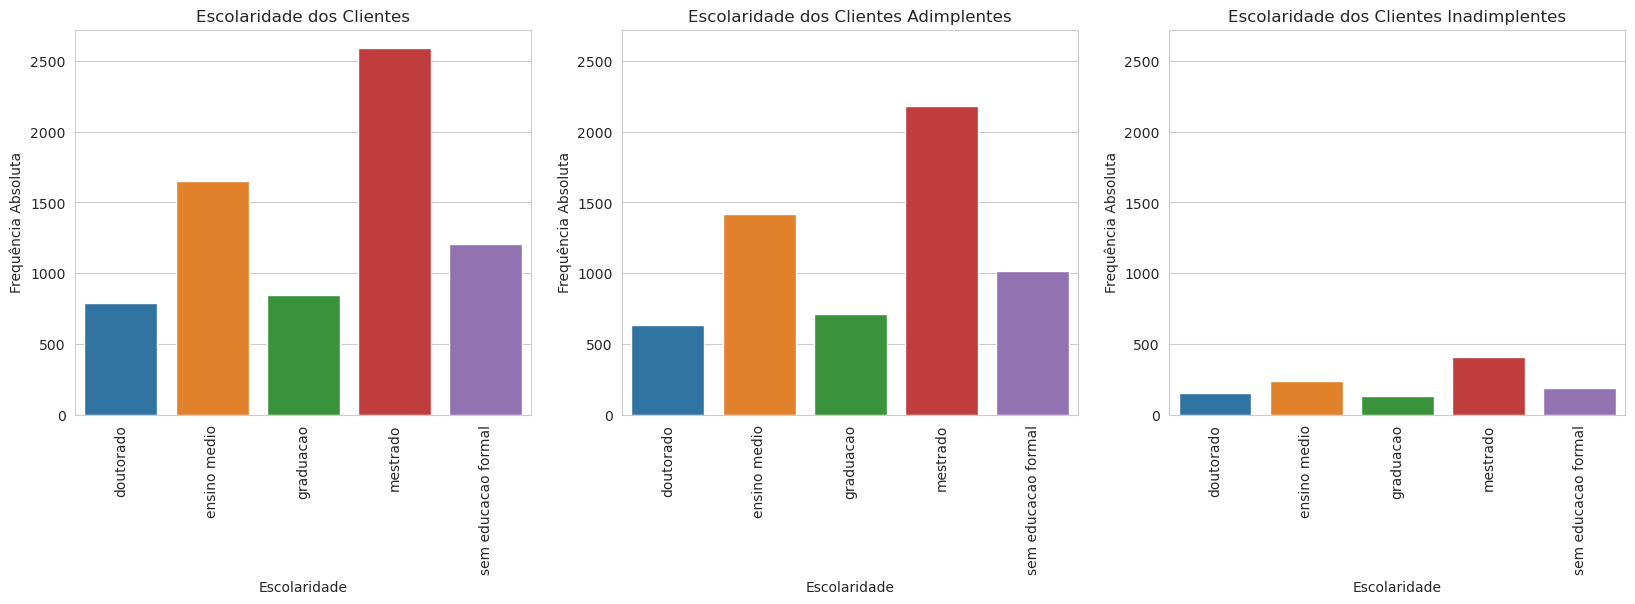

In [87]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

dataframe_to_barplot(df=[df, df_adimplentes, df_inadimplentes], coluna=coluna, titulos=titulos, eixo=0, max_y=0, max=max)


#### Analisando a coluna de salário anual

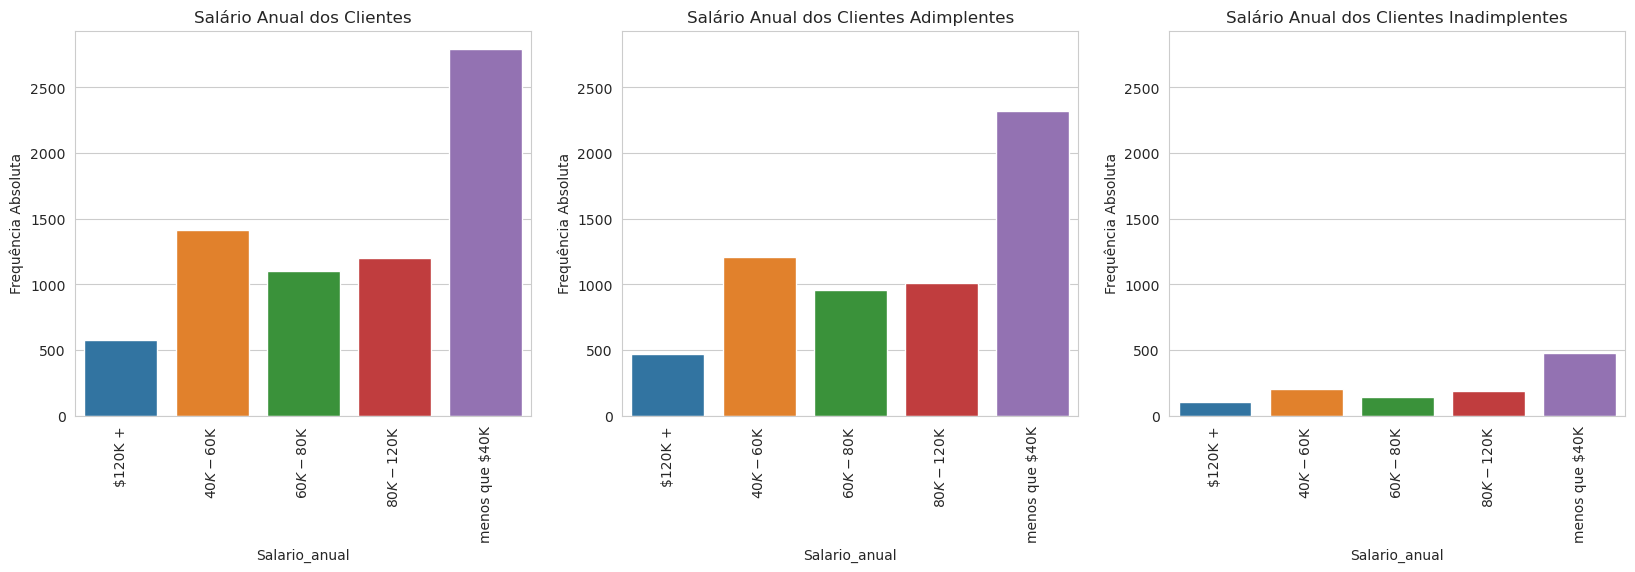

In [88]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

dataframe_to_barplot(df=[df, df_adimplentes, df_inadimplentes], coluna=coluna, titulos=titulos, eixo=0, max_y=0, max=max)

#### Analisando a quantidade de transações nos últimos 12 meses

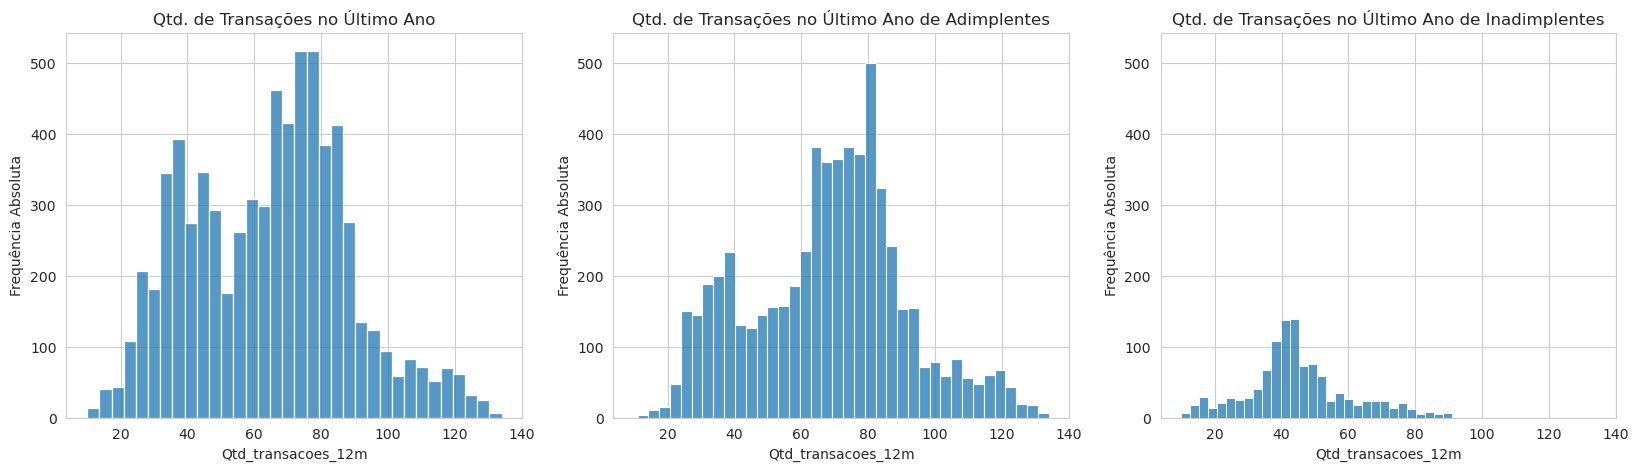

In [96]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

dataframe_to_histplot(df=[df, df_adimplentes, df_inadimplentes], coluna=coluna, titulos=titulos, eixo=0, max_y=0)


#### Analisando o valor das transações nos últimos 12 meses

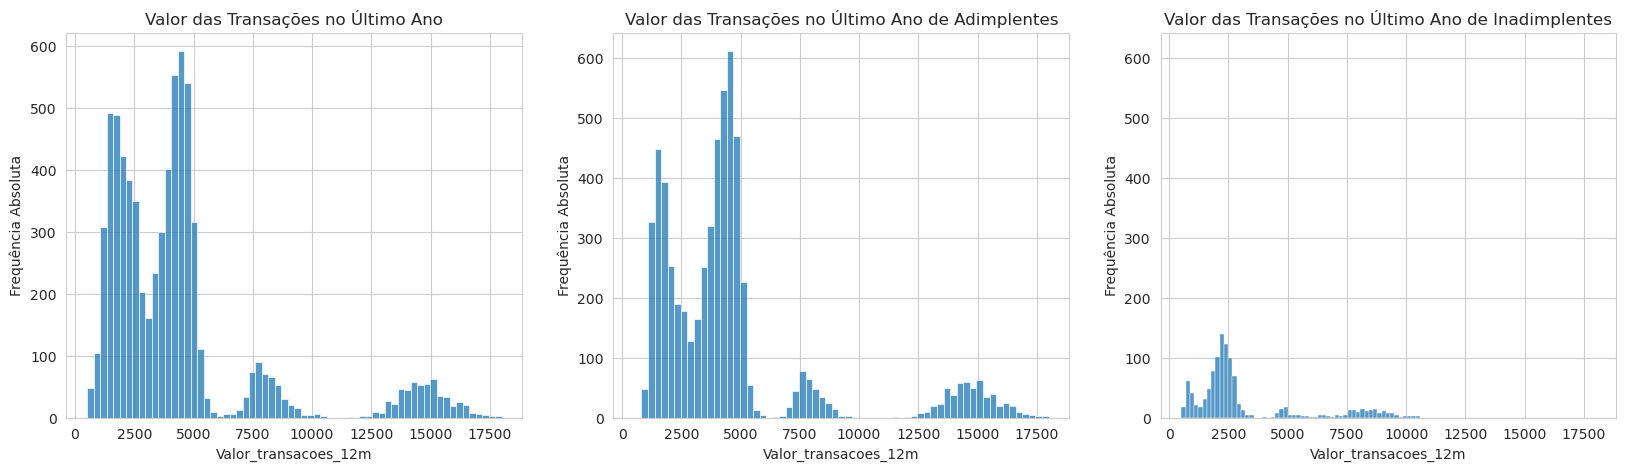

In [97]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

dataframe_to_histplot(df=[df, df_adimplentes, df_inadimplentes], coluna=coluna, titulos=titulos, eixo=0, max_y=0)

#### Valor das transações nos últimos 12 meses x Quantidade de transações nos últimos 12 meses

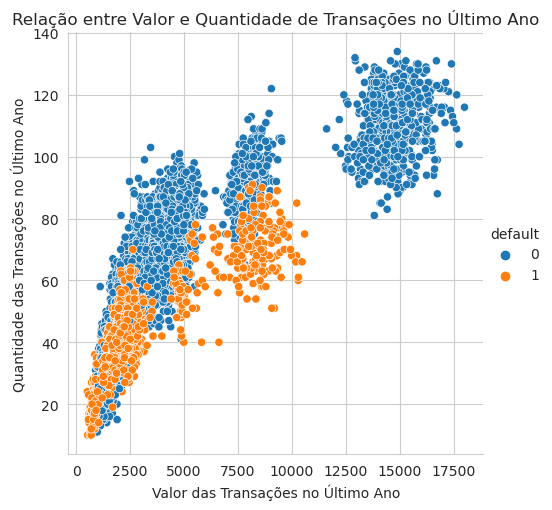

In [98]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

### 6 - Insights:


#### Observa-se que o fator que causa a inadimplência de um cliente é a sua quantidade de transações relacionada com o seu valor. O primeiro grupo de clientes inadimplentes possui um valor de transações entre 0-2500 reais, com um total de 0-60 transações. Já o segundo grupo possui um valor total de transações entre 5000-10000 reais, com um total de 40-80 transações.

#### Para evitar a inadimplência de novos clientes, cabe ao banco observar melhor e monitorar os clientes que se encontram nesses requisitos.